<a href="https://colab.research.google.com/github/riddhi-mehta-1721/DL/blob/master/LabTest/J030_DL_LabTest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split as tts
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense, Flatten,Activation, MaxPooling2D

Using TensorFlow backend.


In [2]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2020-03-07 10:50:46--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  18.8MB/s    in 24s     

2020-03-07 10:51:16 (13.1 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [3]:
!unzip '/content/UCMerced_LandUse.zip'

Archive:  /content/UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  inflating: UCMerc

In [0]:
agricultural='/content/UCMerced_LandUse/Images/agricultural' 
airplane='/content/UCMerced_LandUse/Images/airplane'
baseballdiamond='/content/UCMerced_LandUse/Images/baseballdiamond'
beach='/content/UCMerced_LandUse/Images/beach'
buildings='/content/UCMerced_LandUse/Images/buildings'
chaparral='/content/UCMerced_LandUse/Images/chaparral'
denseresidential='/content/UCMerced_LandUse/Images/denseresidential'
forest='/content/UCMerced_LandUse/Images/forest'
freeway='/content/UCMerced_LandUse/Images/freeway'
golfcourse='/content/UCMerced_LandUse/Images/golfcourse'
harbor='/content/UCMerced_LandUse/Images/harbor'
intersection='/content/UCMerced_LandUse/Images/intersection'
mediumresidential='/content/UCMerced_LandUse/Images/mediumresidential'
mobilehomepark='/content/UCMerced_LandUse/Images/mobilehomepark'
overpass='/content/UCMerced_LandUse/Images/overpass'
parkinglot='/content/UCMerced_LandUse/Images/parkinglot'
river='/content/UCMerced_LandUse/Images/river'
runway='/content/UCMerced_LandUse/Images/runway'
sparseresidential='/content/UCMerced_LandUse/Images/sparseresidential'
storagetanks='/content/UCMerced_LandUse/Images/storagetanks'
tenniscourt='/content/UCMerced_LandUse/Images/tenniscourt'

In [0]:
Size = 150
A = []
B = []

In [0]:
def labels(image,land):
    return land

In [0]:
def pre(land,chg):
    for image in tqdm(os.listdir(chg)):
        label=labels(image,land)
        path = os.path.join(chg,image)
        image = cv2.imread(path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (Size,Size))
        A.append(np.array(image))
        B.append(str(label))

In [8]:
pre('Agricultural',agricultural)

100%|██████████| 100/100 [00:00<00:00, 1095.02it/s]


In [9]:
#pre('Agricultural',agricultural)
pre('Airplane',airplane)
pre('BaseballDiamond',baseballdiamond)
pre('Beach',beach)
pre('Buildings',buildings)
pre('Chaparral',chaparral)
pre('DenseResidential',denseresidential)
pre('Forest',forest)
pre('Freeway',freeway)
pre('Golfcourse',golfcourse)
pre('Harbor',harbor)
pre('Intersection',intersection)
pre('MediumResidential',mediumresidential)
pre('MobileHomePark',mobilehomepark)
pre('Overpass',overpass)
pre('ParkingLot',parkinglot)
pre('River',river)
pre('Runway',runway)
pre('SparseResidential',sparseresidential)
pre('StorageTanks',storagetanks)
pre('TennisCourt',tenniscourt)

100%|██████████| 100/100 [00:00<00:00, 1780.31it/s]


In [0]:
encoder=LabelEncoder()
Y=encoder.fit_transform(B)
Y=to_categorical(Y,21)
A=np.array(A)
A=A/255

In [0]:
X_train,X_test,y_train,y_test = tts(A,Y,test_size=0.20,random_state=53)

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
History = model.fit(X_train,y_train,epochs=60,batch_size=21,validation_data = (X_test,y_test))




Train on 1680 samples, validate on 420 samples
Epoch 1/60





1680/1680 [==============================] - 18s 10ms/step - loss: 0.1865 - acc: 0.9523 - val_loss: 0.1762 - val_acc: 0.9520
Epoch 2/60
1680/1680 [==============================] - 2s 1ms/step - loss: 0.1649 - acc: 0.9521 - val_loss: 0.1512 - val_acc: 0.9517
Epoch 3/60
1680/1680 [==============================] - 2s 1ms/step - loss: 0.1288 - acc: 0.9562 - val_loss: 0.1244 - val_acc: 0.9568
Epoch 4/60
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0943 - acc: 0.9650 - val_loss: 0.1125 - val_acc: 0.9605
Epoch 5/60
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0688 - acc: 0.9749 - val_loss: 0.1275 - val_acc: 0.9600
Epoch 6/60
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0395 - acc: 0.9855 - val_loss: 0.1522 - val_acc: 0.9568
Epoch 7/60
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0239 - acc: 0.9913 - val_loss: 0.1677 - val_acc: 0.9584
Epoch

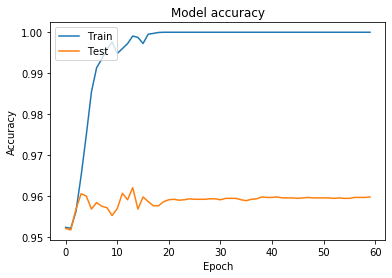

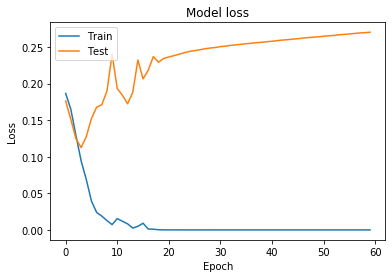

In [15]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch'  )
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test)

In [0]:
import seaborn as sns

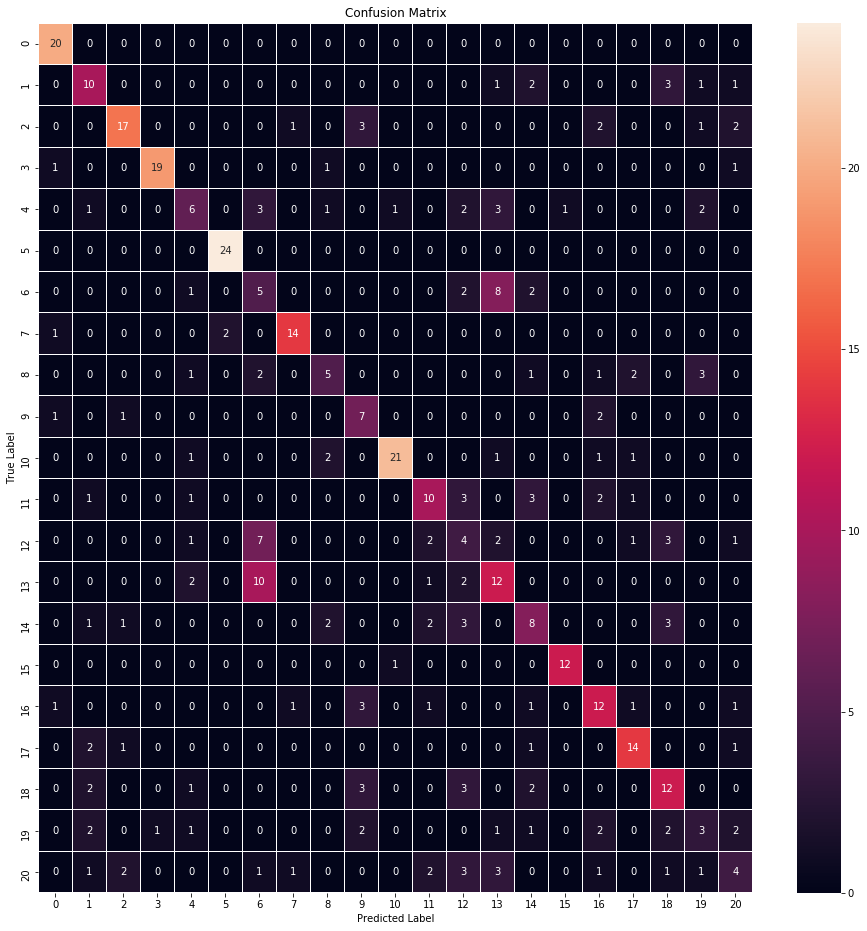

In [18]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test,axis = 1) 
y_pred_classes = np.argmax(y_pred,axis = 1) 
cm = confusion_matrix(y_true, y_pred_classes)
plt.subplots(figsize=(16, 16))
sns.heatmap(cm, annot=True, linewidths=0.01,linecolor="white")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

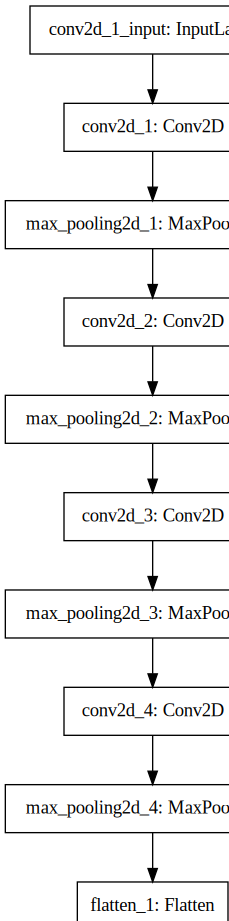

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))